<a href="https://colab.research.google.com/github/Naveen-DS08/Lead_Scoring_Assignment/blob/main/LeadScoring_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing basic libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# **Data Reading and Understanding**

In [3]:
# Importing the dataset

leads_df = pd.read_csv('https://raw.githubusercontent.com/Naveen-DS08/Lead_Scoring_Assignment/main/Leads.csv')

leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# shape of data
leads_df.shape

(9240, 37)

The dataset contains more than 9000 rows with 37 features

In [5]:
# Cheacking for any duplicates present in the data

leads_df.duplicated().sum()

0

In [6]:
# Basic information about the data
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Many of the categorical variables have a level called 'Select' which needs to be handled

# **Data Cleaning**

In [7]:
# Replacing 'Select' variable to null
leads_df = leads_df.replace('Select',np.NAN)

In [8]:
# Percentage of null values present in each features

(leads_df.isnull().mean()*100).round(2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

There is no use with features has more than 40 percentage of null values, Hence we can drop these features.

In [9]:
# Removing the features having more than 40% of null values

features_with_more_nullValue = [ i for i in leads_df.columns if (leads_df[i].isnull().mean()*100) > 40 ]

leads_df.drop(features_with_more_nullValue,axis=1, inplace=True)

In [10]:
# Now checking the shape of the data

leads_df.shape

(9240, 30)

In [11]:
# 'city' feature which has almost 40% null values, we can drop
leads_df.drop(['City'], axis=1, inplace=True)

In [12]:
# Checking 'Specialization' feature which has 36.53% of null values

leads_df['Specialization'].value_counts(normalize=True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

It may be possible that the lead may leave this column blank if he may be a student or his specialization is not there in the options given. So we can create a another category 'Others' for this.


In [13]:
# Replacing null variable to 'others'

leads_df['Specialization'] = leads_df['Specialization'].replace(np.NaN, 'Others')

In [14]:
# Checking 'Tags' feature which has 36.29% of null values

leads_df['Tags'].value_counts(normalize=True, dropna=False)*100

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

Since, missing values are high , we can impute all missing values with value 'not provided'

In [15]:
# Replacing nul value with 'not provided'
leads_df['Tags'] = leads_df['Tags'].replace(np.nan,'not provided')

In [16]:
# Checking 'What matters most to you in choosing a course' feature which has 29.32% null values

leads_df['What matters most to you in choosing a course'].value_counts(normalize=True,dropna=False)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

We can see that this is highly skewed feature so we can remove this feature.

In [17]:
# Drop this features

leads_df.drop(['What matters most to you in choosing a course'], axis=1, inplace=True)

In [18]:
# Checking 'What is your current occupation' feature which has 29.11% null values
leads_df['What is your current occupation'].value_counts(dropna=False, normalize=True)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [19]:
# Replace null values with 'Other' which already present
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan,'Other')

In [20]:
# Checking Country feature which has 26.63% of null values

leads_df['Country'].value_counts(dropna=False, normalize=True)*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

Since the 'Country' feature is highly skewed, we can remove this feature

In [21]:
# Droping 'Country' feature

leads_df.drop(['Country'], axis=1, inplace=True)

In [22]:
# Rechecking the percentage of null values present in the data

(leads_df.isnull().mean()*100).round(2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Last Activity                               1.11
Lead Source                                 0.39
Prospect ID                                 0.00
X Education Forums                          0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Tags                                        0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
Search                                      0.00
Newspaper Article                           0.00
Magazine                                    0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization      

Dropping the rows which has null values since it is less than 2 percent

In [23]:
# Dropping the rows with null values
leads_df.dropna(inplace=True)

In [24]:
# Now checking for the null values present in the data

leads_df.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Tags                              

Now we dont have any null values present in the data

In [25]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

In [26]:
# Categorical features
cat_features = [feature for feature in leads_df.columns
                   if leads_df[feature].dtypes == 'O' ]

cat_features

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [27]:
# Looking data frame with categorical features
leads_df[cat_features].head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,Others,Unemployed,No,No,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,Email Opened,Others,Unemployed,No,No,...,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,Email Opened,Business Administration,Student,No,No,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,Unreachable,Media and Advertising,Unemployed,No,No,...,No,No,No,No,Ringing,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,Converted to Lead,Others,Unemployed,No,No,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


In [28]:
# Checking for number of unique values present in categorical data frame

leads_df[cat_features].nunique()

Prospect ID                                 9074
Lead Origin                                    4
Lead Source                                   21
Do Not Email                                   2
Do Not Call                                    2
Last Activity                                 17
Specialization                                19
What is your current occupation                6
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates About Our Courses         1
Tags                                          27
Update me on Supply Chain Content              1
Get updates on DM Content                      1
I agree to pay the amount through cheque       1
A free copy of Maste

Since Prospect ID is the unique id and we also don't need for future analysis. we can either drop or change this featur as index.

For our cases we don't drop we change this to index.

In [29]:
# Setting Prospect ID as index

leads_df.set_index(['Prospect ID'],inplace=True)


In [30]:
# Lets update the categorical feature list once.
cat_features = [feature for feature in leads_df.columns
                   if leads_df[feature].dtypes == 'O' ]

In [31]:
#remove categorical variables that are present less than 1% of the observations
# since these variables doesnt affects our analysis
for feature in cat_features:
    temp_df = leads_df.groupby(feature)['Converted'].mean()
    temp_cols = temp_df[temp_df>0.01].index
    leads_df[feature] = np.where(leads_df[feature].isin(temp_cols),leads_df[feature],'rareVar')


In [32]:
# Rechecking number of unique values present
leads_df[cat_features].nunique()

Lead Origin                                  4
Lead Source                                 15
Do Not Email                                 2
Do Not Call                                  2
Last Activity                               17
Specialization                              19
What is your current occupation              6
Search                                       2
Magazine                                     1
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
Receive More Updates About Our Courses       1
Tags                                        21
Update me on Supply Chain Content            1
Get updates on DM Content                    1
I agree to pay the amount through cheque     1
A free copy of Mastering The Interview       2
Last Notable Activity                       15
dtype: int64

In [33]:
# value counts in categorical features

for feature in cat_features:
  print(feature)
  print(leads_df[feature].value_counts(normalize=True)*100)
  print('*'*50)

Lead Origin
Landing Page Submission    53.835133
API                        39.431342
Lead Add Form               6.402909
Lead Import                 0.330615
Name: Lead Origin, dtype: float64
**************************************************
Lead Source
Google              31.606789
Direct Traffic      28.025127
Olark Chat          19.318933
Organic Search      12.717655
Reference            4.882081
Welingak Website     1.421644
Referral Sites       1.377562
Facebook             0.341635
rareVar              0.132246
bing                 0.066123
Click2call           0.044082
Social Media         0.022041
Live Chat            0.022041
WeLearn              0.011020
NC_EDM               0.011020
Name: Lead Source, dtype: float64
**************************************************
Do Not Email
No     92.109323
Yes     7.890677
Name: Do Not Email, dtype: float64
**************************************************
Do Not Call
No     99.977959
Yes     0.022041
Name: Do Not Call, dtype: flo

As we can see many categorical features are highly skewed. we can drop the features which has the variable skeweness above 95%

In [34]:
feature_to_drop = ['Do Not Call','Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                   'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']

In [35]:
leads_df.drop(feature_to_drop, axis=1, inplace=True)

leads_df.shape

(9074, 14)

In [36]:
leads_df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

We can drop 'Tags' features also since this feature is generated by the sales team for their analysis,this may not be useful for our model building

In [37]:
# Dropping 'Tags' feature
leads_df.drop(['Tags'], axis=1,inplace=True)

In [38]:
num_features = [ i for i in leads_df.columns if leads_df[i].dtypes != 'O']
num_features

['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

# **Exploratory Data Analysis**

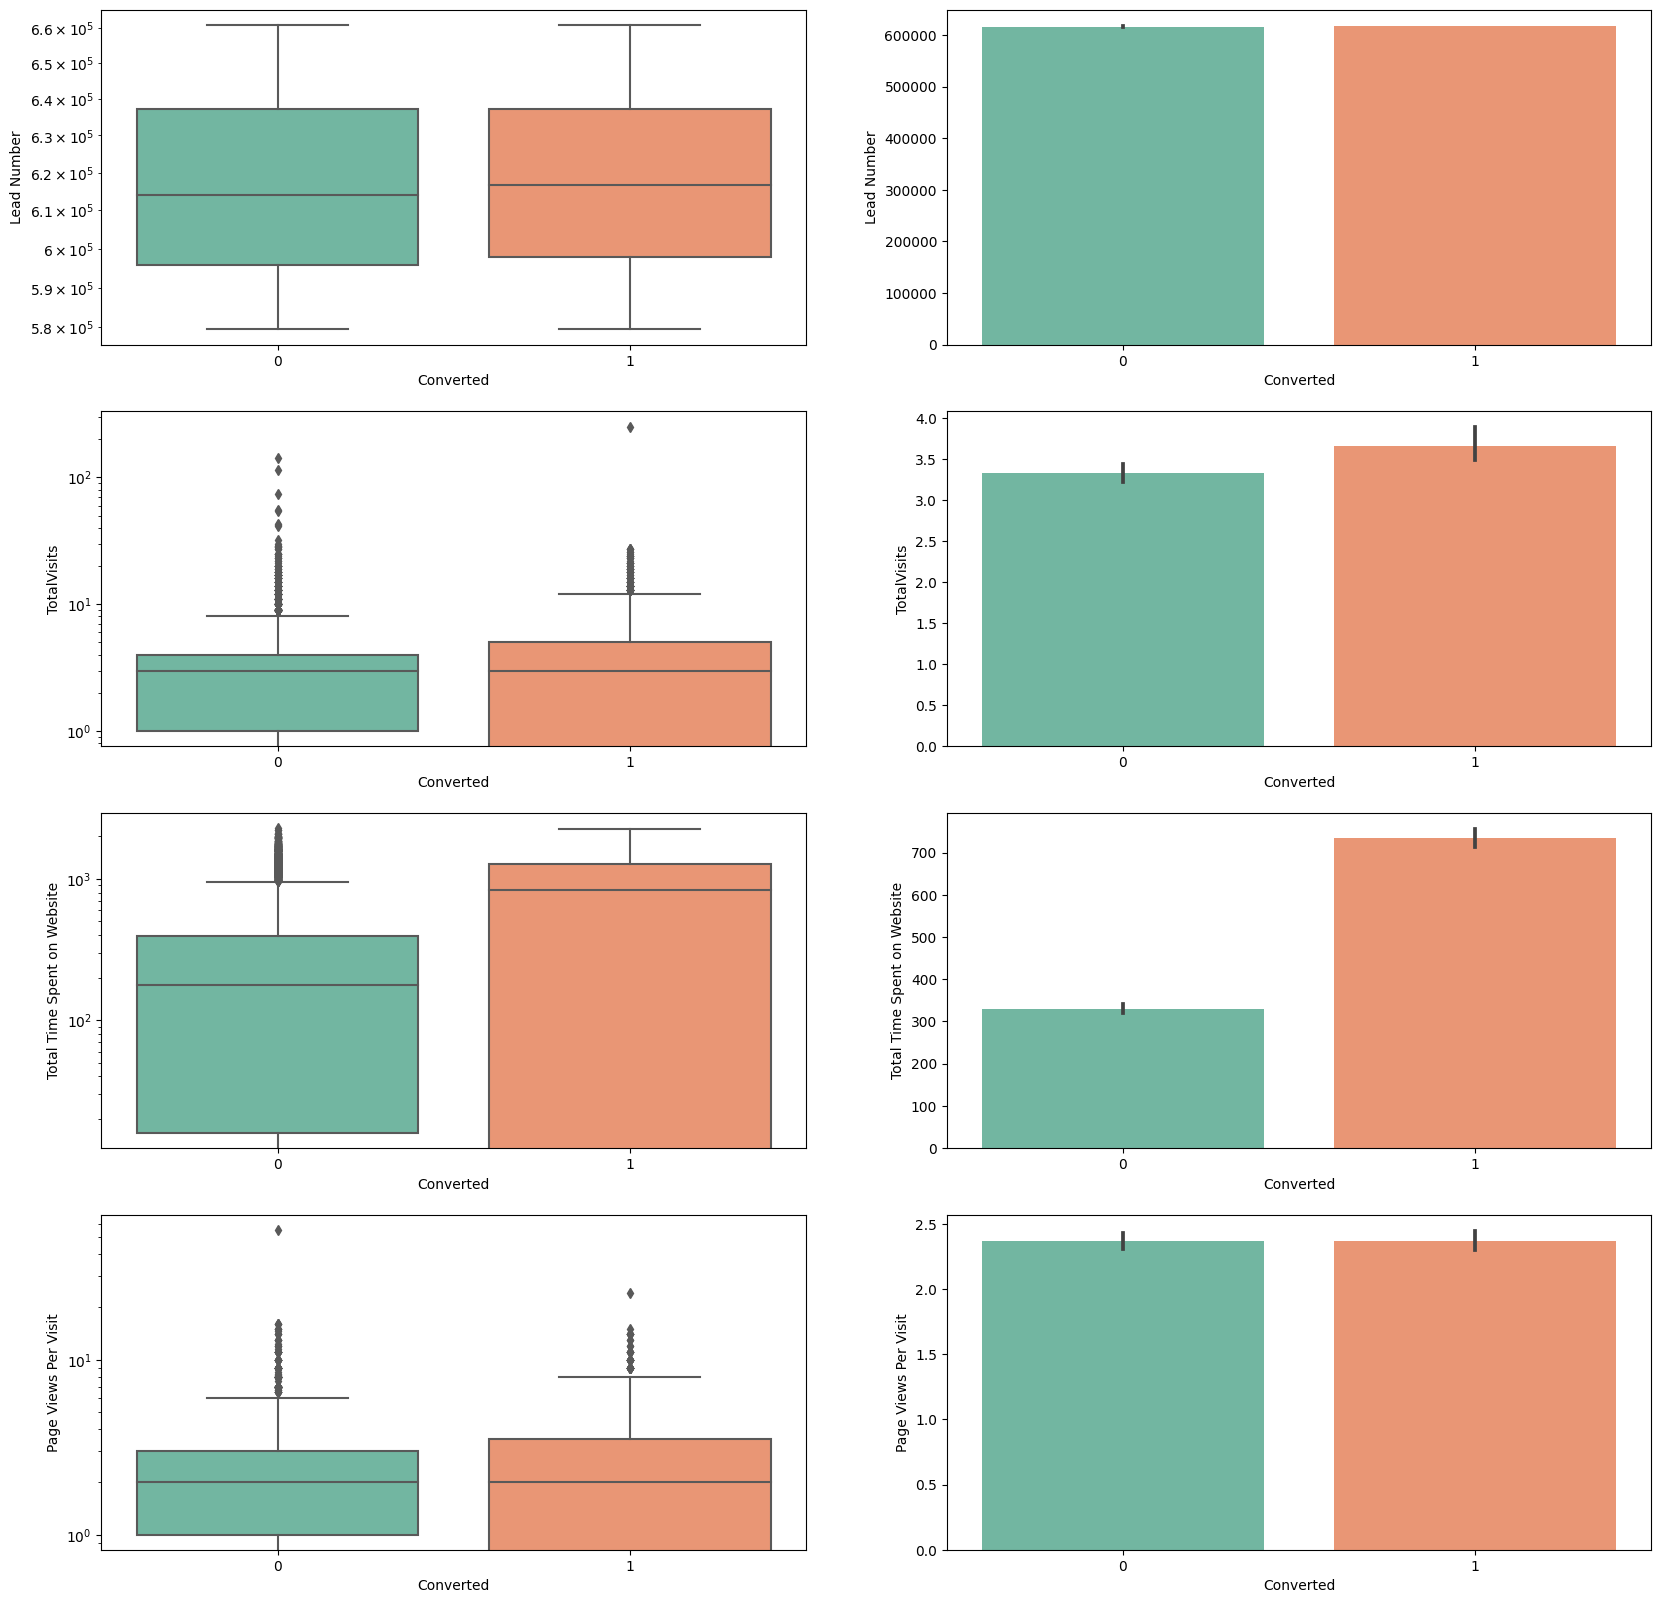

In [39]:
# Numerical features analysis

a,b,c = 4,2,1
plt.figure(figsize=(20,20))
for i in num_features:
  if i != 'Converted':

    plt.subplot(a,b,c)
    sns.boxplot(data=leads_df, x='Converted', y=i,palette='Set2')
    plt.yscale('log')
    c+=1
    plt.subplot(a,b,c)
    sns.barplot(y = i, x='Converted', palette='Set2', data = leads_df)
    c+=1
plt.show()



**Total Visits**
* As the median for both converted and non-converted leads are same , nothing coclusive can be said on the basis of feature TotalVisits.

**Total Time Spent on Website**
* As can be seen, leads spending more time on website are more likely to convert , thus website should be made more enagaging to increase conversion rate.

**Page Views Per Visit**
* As the median for both converted and non-converted leads are same , nothing coclusive can be said on the basis of feature Page Views Per Visit.


Here Lead Number feature is unnecessary for our analysis.Hence drop that feature

In [40]:
# Dropping 'Lead Number' feature
leads_df.drop('Lead Number',axis=1, inplace=True)

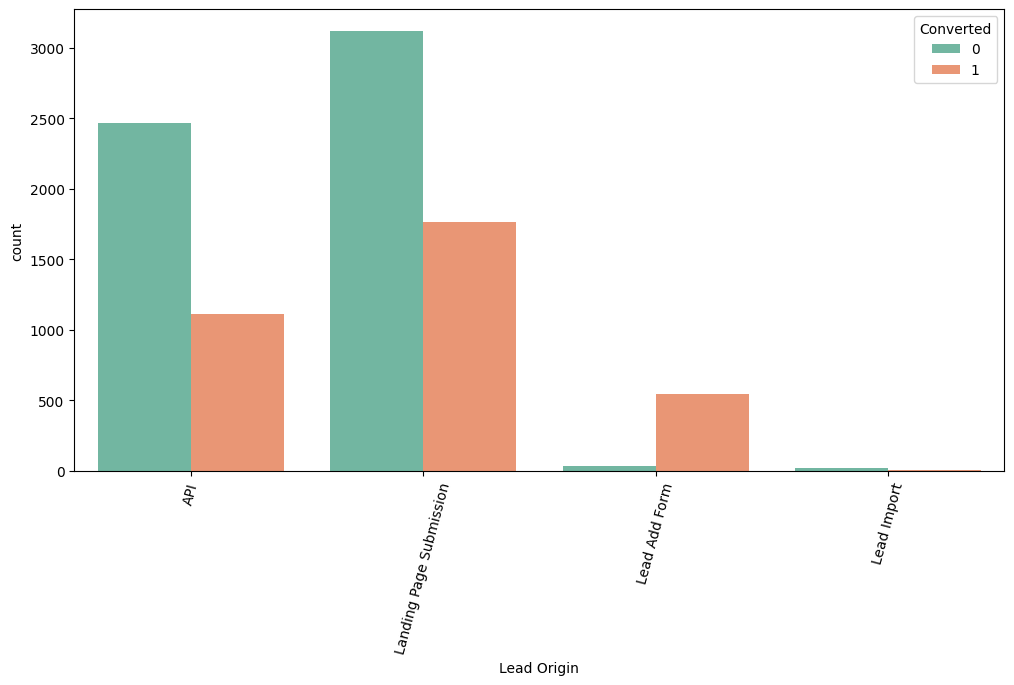

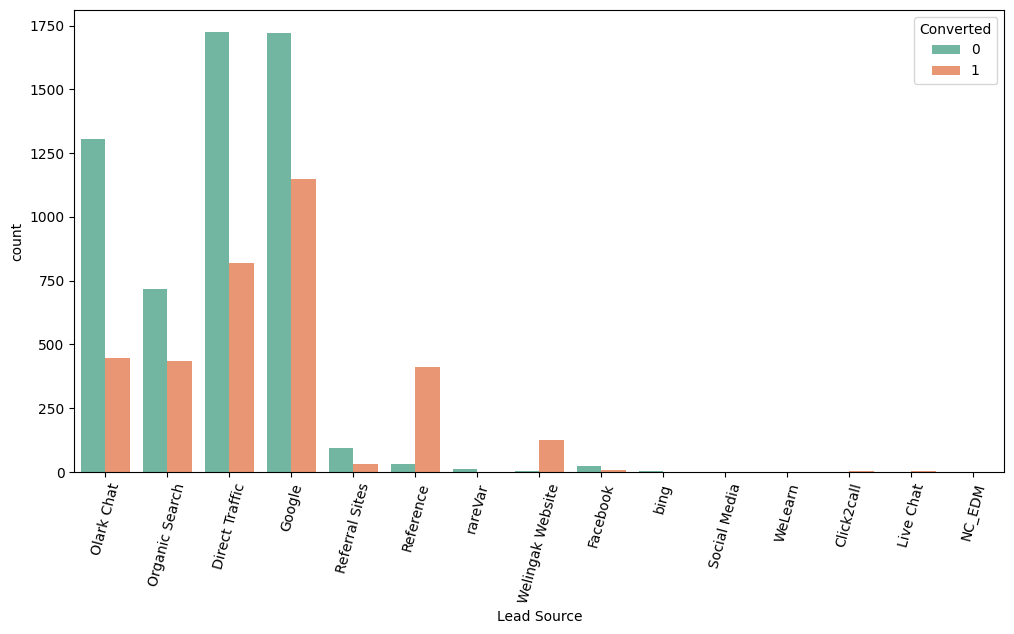

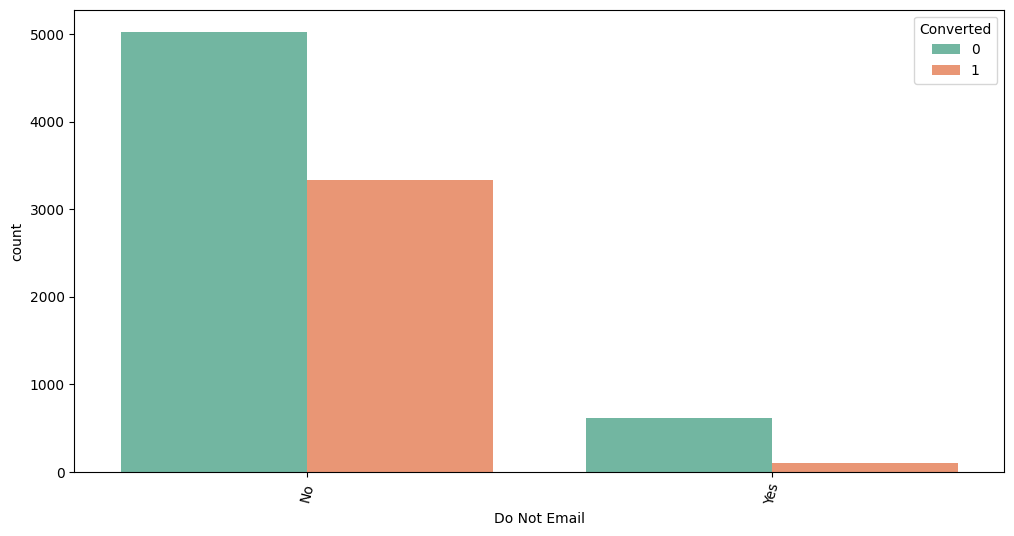

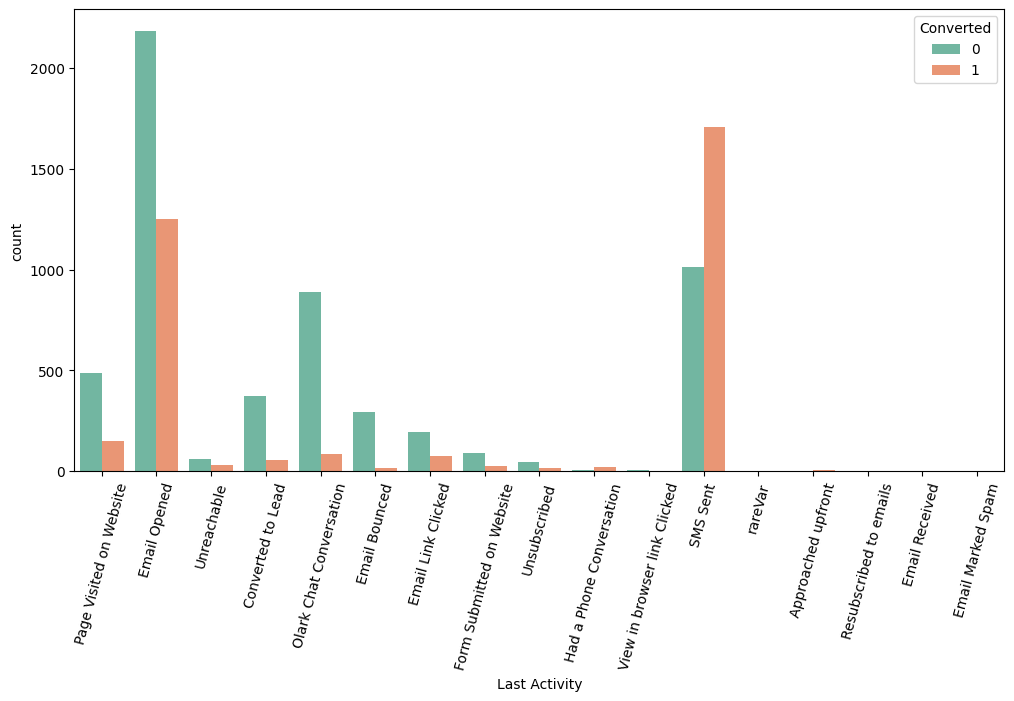

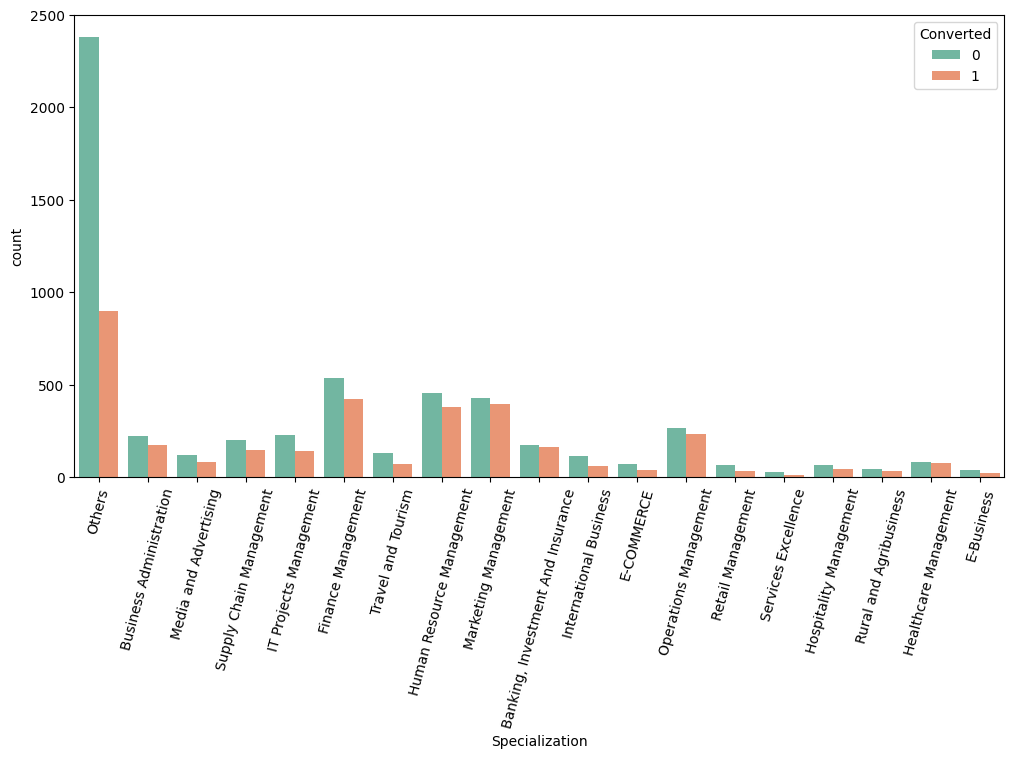

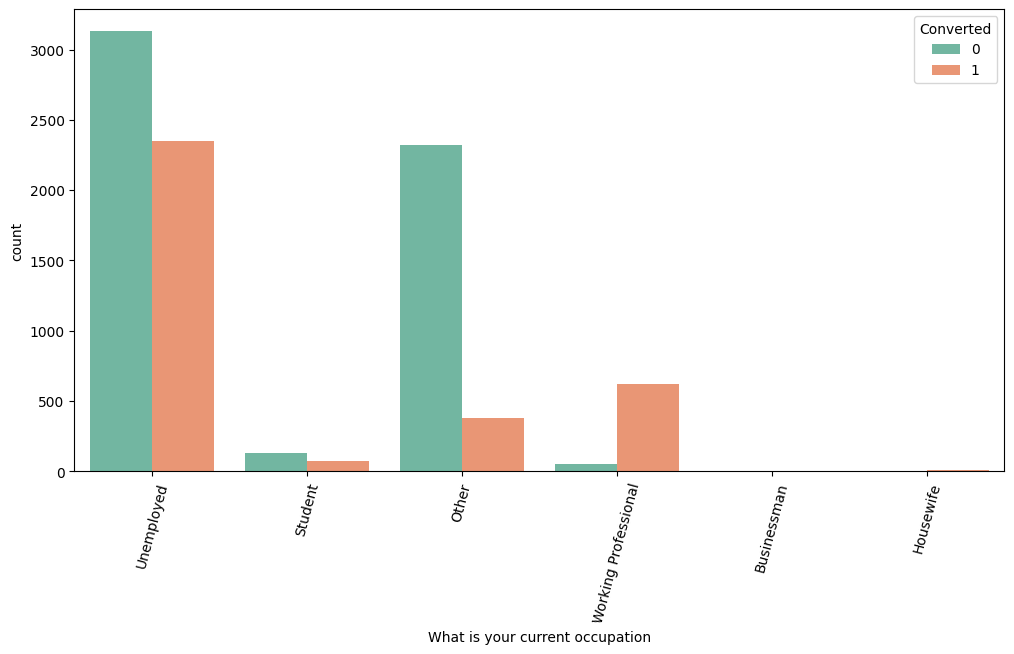

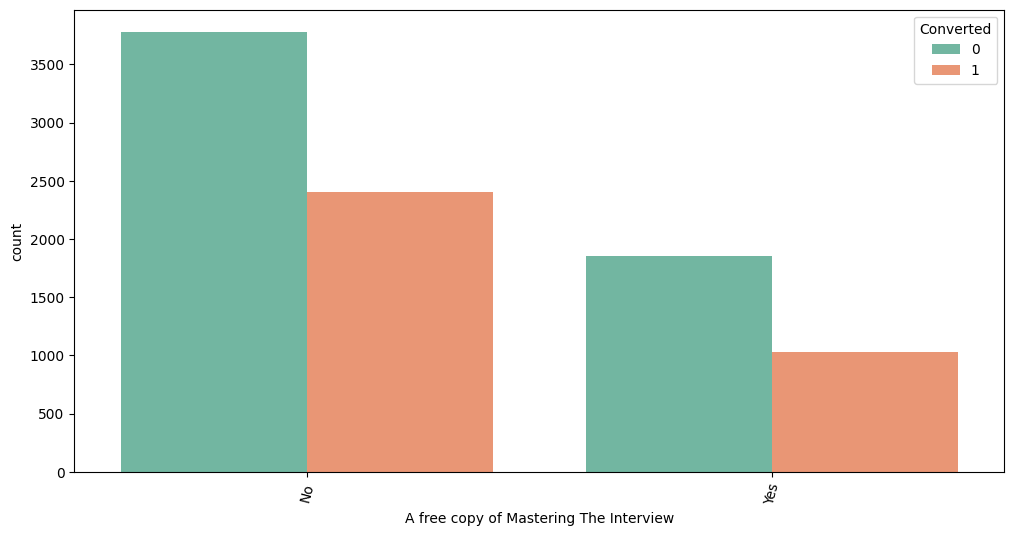

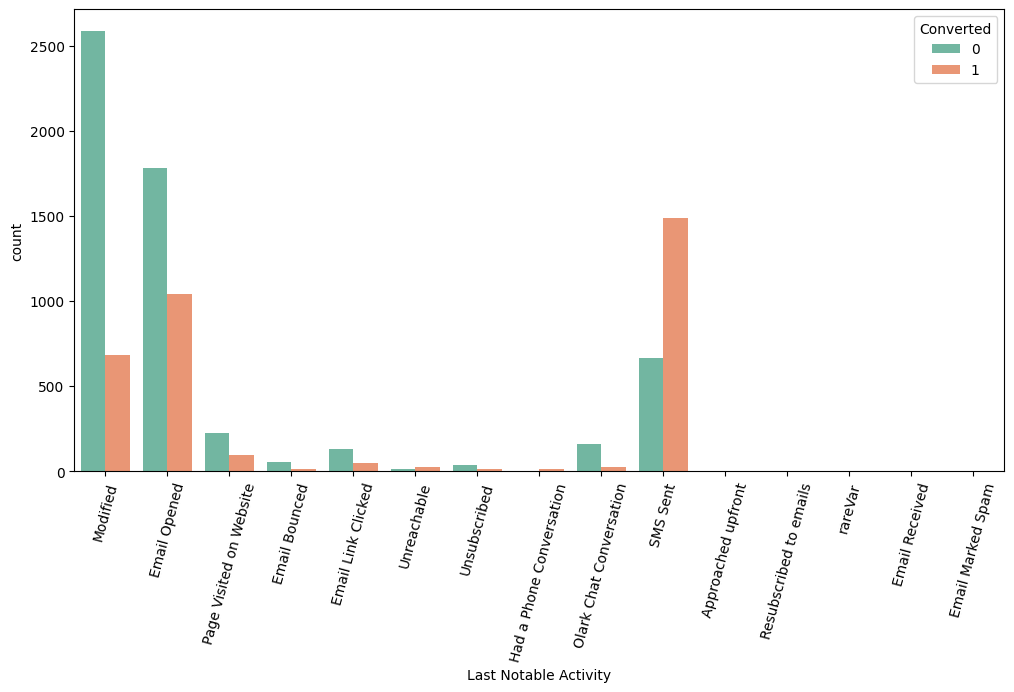

In [57]:
# Analysing Categorical features

cat_features = [i for i in leads_df.columns if leads_df[i].dtypes == 'O']

for i in cat_features:
  plt.figure(figsize=(12,6))
  sns.countplot(data=leads_df, x=i, hue='Converted', palette='Set2')
  plt.xticks(rotation=75)
  plt.show()

**Lead Source**
* Maximum Leads are generated by Google and Direct Traffic.
* Conversion rate of Reference leads and Welinkgak Website leads is very high.

**Last Activity**
* Maximum leads are generated having last activity as Email opened but conversion rate is not too good.
* SMS sent as last acitivity has high conversion rate.

**Cccupation**
*  Maximum leads generated are unemployed and their conversion rate is more than 50%.
*  Conversion rate of working professionals is very high




